# Comparison of MHMCMC and NUTS for Multivariate Gaussian and Ring

In [337]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import matplotlib
plt.style.use('seaborn')
sns.set_context("poster",font_scale=1)
%matplotlib inline

## 50 dimensional, highly correlated Gaussian

In [5]:
np.random

In [259]:
pm.NUTS?

In [293]:
ndim = 2
with pm.Model() as a:
    x = pm.Categorical("x",np.array([0.5, 0.5]))
    mu = pm.Deterministic("mu", x*4.5)
    y = pm.MvNormal('y', mu=mu, cov=np.identity(ndim), shape=(ndim))
    step = pm.NUTS(max_treedepth=1)
    trace = pm.sample(1000)

Assigned BinaryGibbsMetropolis to x
Assigned NUTS to y
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [y]
>BinaryGibbsMetropolis: [x]
100%|██████████| 1500/1500 [00:03<00:00, 417.17it/s]


In [294]:
ys = trace.get_values("y")

In [302]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

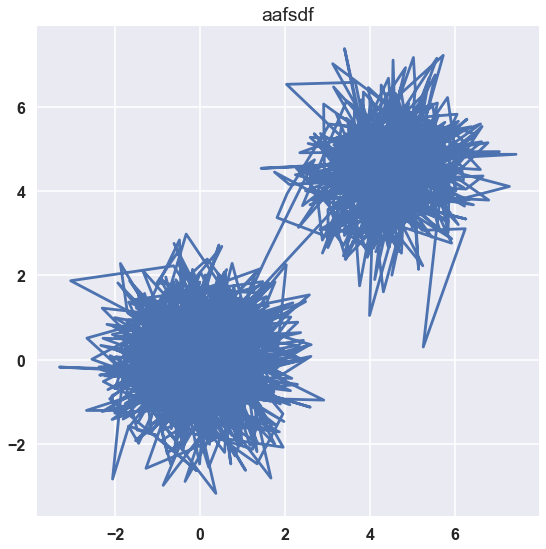

In [340]:

_ = plt.figure(figsize=(9,9))
_ = plt.plot(ys[:,0], ys[:,1])
_ = plt.title("aafsdf")

In [52]:
sample_N = 1000

metr_ring_model = pm.Model()
nuts_ring_model = pm.Model()
cov = np.identity(ndim)/10

with metr_ring_model:
    mu = pm.Normal('mu', mu=0, sd=1, shape=ndim, testval=0.1)
    y = pm.MvNormal('y', mu=mu_circle.flatten(), cov=np.identity(ndim)/10, shape=(ndim))
    step = pm.Metropolis(vars=[mu, y, mu_circle])
    trace = pm.sample(sample_N, step=step, tune=1000)
#metr_ring_y = trace2.get_values("y")
#metr_ring_y = metr_ring_y.reshape(sample_N, ndim)
"""
with nuts_ring_model:
    mu = pm.Normal('mu', mu=0, sd=1, shape=(ndim), testval=0.1)
    mu_circle = pm.Deterministic("mu_circle", 5*(mu/np.sqrt((mu**2).sum())))
    y = pm.MvNormal('y', mu=mu_circle, cov=np.identity(ndim)/10, shape=(ndim))
    step = pm.NUTS([mu, y])
    trace = pm.sample(sample_N, step=step, tune=1000)
nuts_ring_y = trace.get_values("y")
nuts_ring_y = nuts_ring_y.reshape(sample_N, ndim)
"""

NameError: name 'mu_circle' is not defined

In [13]:
pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.])))

ValueError: Incompatible parameterization. Specify exactly one of tau, cov, or chol.

In [18]:
import seaborn as sns

In [22]:
N = 1000
mv_model = pm.Model()
with mv_model:
    y = pm.NormalMixture("y", w=np.ones(2), mu=np.array([0.,3.]), sd=np.ones(2))
    step = pm.NUTS()
    trace = pm.sample(1000, step=step)
#pm.traceplot(trace)
background_y = trace.get_values("y")

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y]
  0%|          | 0/1500 [00:00<?, ?it/s]


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    179         sys.exit(msg)
    180     main_globals = sys.modules["__main__"].__dict__
    181     if alter_argv:
    182         sys.argv[0] = mod_spec.origin
    183     return _run_code(code, main_globals, None,
--> 184                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py')
    185 
    186 def run_module(mod_name, init_globals=None,
    187                run_name=None, alter_sys=False):
    188     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7fc1ff2fd540, file "/...3.5/dist-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.5/dist-packages/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fc1ff2fd540, file "/...3.5/dist-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.5/dist-packages/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 4, 10, 37, 53, 598968, tzinfo=datetime.timezone.utc), 'msg_id': '62FA23EACCC8476880005EAC2BB8AAF1', 'msg_type': 'execute_request', 'session': '3944F7A4926349D39E55B9485369236B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '62FA23EACCC8476880005EAC2BB8AAF1', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'3944F7A4926349D39E55B9485369236B']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 4, 10, 37, 53, 598968, tzinfo=datetime.timezone.utc), 'msg_id': '62FA23EACCC8476880005EAC2BB8AAF1', 'msg_type': 'execute_request', 'session': '3944F7A4926349D39E55B9485369236B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '62FA23EACCC8476880005EAC2BB8AAF1', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'3944F7A4926349D39E55B9485369236B'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 4, 10, 37, 53, 598968, tzinfo=datetime.timezone.utc), 'msg_id': '62FA23EACCC8476880005EAC2BB8AAF1', 'msg_type': 'execute_request', 'session': '3944F7A4926349D39E55B9485369236B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '62FA23EACCC8476880005EAC2BB8AAF1', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', store_history=True, silent=False, shell_futures=True)
   2678                 self.displayhook.exec_result = result
   2679 
   2680                 # Execute the user code
   2681                 interactivity = "none" if silent else self.ast_node_interactivity
   2682                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2683                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2684                 
   2685                 self.last_execution_succeeded = not has_raised
   2686 
   2687                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.With object>, <_ast.Assign object>], cell_name='<ipython-input-22-cf63448914df>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fc1a4d89390, executi..._before_exec=None error_in_exec=None result=None>)
   2782 
   2783         try:
   2784             for i, node in enumerate(to_run_exec):
   2785                 mod = ast.Module([node])
   2786                 code = compiler(mod, cell_name, "exec")
-> 2787                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fc1a51a2810, file "<ipython-input-22-cf63448914df>", line 3>
        result = <ExecutionResult object at 7fc1a4d89390, executi..._before_exec=None error_in_exec=None result=None>
   2788                     return True
   2789 
   2790             for i, node in enumerate(to_run_interactive):
   2791                 mod = ast.Interactive([node])

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fc1a51a2810, file "<ipython-input-22-cf63448914df>", line 3>, result=<ExecutionResult object at 7fc1a4d89390, executi..._before_exec=None error_in_exec=None result=None>)
   2842         outflag = True  # happens in more places, so it's easier as default
   2843         try:
   2844             try:
   2845                 self.hooks.pre_run_code_hook()
   2846                 #rprint('Running code', repr(code_obj)) # dbg
-> 2847                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fc1a51a2810, file "<ipython-input-22-cf63448914df>", line 3>
        self.user_global_ns = {'In': ['', "get_ipython().magic('pinfo plt.plot')", "import pymc3 as pm\nimport numpy as np\nimport mat...mport os\nget_ipython().magic('matplotlib inline')", "get_ipython().magic('pinfo plt.plot')", "import pymc3 as pm\nimport numpy as np\nimport mat...mport os\nget_ipython().magic('matplotlib inline')", "get_ipython().magic('pinfo pm.Categorical')", "get_ipython().magic('pinfo pm.Mixture')", 'pm.Mixture(pm.MvNormal.dist())', 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.], cov=np.array([[1., 0.],[0., 1.]]))))', 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.])))', "get_ipython().magic('pinfo pv.MvNormal.dist')", "get_ipython().magic('pinfo pm.MvNormal.dist')", 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.],cov=np.identity(2))))', 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.])))', 'mv_model = pm.Model()\nwith mv_model:\n    y = pm....eplot(trace)\nbackground_y = trace.get_values("y")', 'mv_model = pm.Model()\nwith mv_model:\n    y = pm....eplot(trace)\nbackground_y = trace.get_values("y")', 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', 'sns.distplot(background_y)', 'import seaborn as sns', 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', ...], 'N': 1000, 'Out': {20: <matplotlib.axes._subplots.AxesSubplot object>}, '_': <matplotlib.axes._subplots.AxesSubplot object>, '_20': <matplotlib.axes._subplots.AxesSubplot object>, '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '__doc__': 'Automatically created module for IPython interactive environment', ...}
        self.user_ns = {'In': ['', "get_ipython().magic('pinfo plt.plot')", "import pymc3 as pm\nimport numpy as np\nimport mat...mport os\nget_ipython().magic('matplotlib inline')", "get_ipython().magic('pinfo plt.plot')", "import pymc3 as pm\nimport numpy as np\nimport mat...mport os\nget_ipython().magic('matplotlib inline')", "get_ipython().magic('pinfo pm.Categorical')", "get_ipython().magic('pinfo pm.Mixture')", 'pm.Mixture(pm.MvNormal.dist())', 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.], cov=np.array([[1., 0.],[0., 1.]]))))', 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.])))', "get_ipython().magic('pinfo pv.MvNormal.dist')", "get_ipython().magic('pinfo pm.MvNormal.dist')", 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.],cov=np.identity(2))))', 'pm.Mixture(pm.MvNormal.dist(mu=np.array([0., 0.])))', 'mv_model = pm.Model()\nwith mv_model:\n    y = pm....eplot(trace)\nbackground_y = trace.get_values("y")', 'mv_model = pm.Model()\nwith mv_model:\n    y = pm....eplot(trace)\nbackground_y = trace.get_values("y")', 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', 'sns.distplot(background_y)', 'import seaborn as sns', 'N = 1000\nmv_model = pm.Model()\nwith mv_model:\n  ...eplot(trace)\nbackground_y = trace.get_values("y")', ...], 'N': 1000, 'Out': {20: <matplotlib.axes._subplots.AxesSubplot object>}, '_': <matplotlib.axes._subplots.AxesSubplot object>, '_20': <matplotlib.axes._subplots.AxesSubplot object>, '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '__doc__': 'Automatically created module for IPython interactive environment', ...}
   2848             finally:
   2849                 # Reset our crash handler in place
   2850                 sys.excepthook = old_excepthook
   2851         except SystemExit as e:

...........................................................................
/home/melih/Desktop/projects/cmpe548/cmpe548project/<ipython-input-22-cf63448914df> in <module>()
      1 N = 1000
      2 mv_model = pm.Model()
      3 with mv_model:
      4     y = pm.NormalMixture("y", w=np.ones(2), mu=np.array([0.,3.]), sd=np.ones(2))
      5     step = pm.NUTS()
----> 6     trace = pm.sample(1000, step=step)
      7 #pm.traceplot(trace)
      8 background_y = trace.get_values("y")

...........................................................................
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/sampling.py in sample(draws=1500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, init='auto', n_init=200000, start=[{}, {}], trace=None, chain_idx=0, chains=2, njobs=2, tune=500, nuts_kwargs=None, step_kwargs=None, progressbar=True, model=<pymc3.model.Model object>, random_seed=[303996612, 233226272], live_plot=False, discard_tuned_samples=True, live_plot_kwargs=None, **kwargs={})
    405     parallel = njobs > 1 and chains > 1 and not has_population_samplers
    406     if parallel:
    407         pm._log.info('Multiprocess sampling ({} chains in {} jobs)'.format(chains, njobs))
    408         print_step_hierarchy(step)
    409         try:
--> 410             trace = _mp_sample(**sample_args)
        trace = None
        sample_args = {'chain': 0, 'chains': 2, 'draws': 1500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 2, 'progressbar': True, 'random_seed': [303996612, 233226272], 'start': [{}, {}], ...}
    411         except pickle.PickleError:
    412             pm._log.warn("Could not pickle model, sampling singlethreaded.")
    413             pm._log.debug('Pickling error:', exec_info=True)
    414             parallel = False

...........................................................................
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/sampling.py in _mp_sample(**kwargs={'draws': 1500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500})
    923 
    924     chain_nums = list(range(chain, chain + chains))
    925     pbars = [kwargs.pop('progressbar')] + [False] * (chains - 1)
    926     jobs = (delayed(_sample)(*args, **kwargs)
    927             for args in zip(chain_nums, pbars, rseed, start))
--> 928     traces = Parallel(n_jobs=njobs)(jobs)
        traces = undefined
        njobs = 2
        jobs = <generator object _mp_sample.<locals>.<genexpr>>
    929     return MultiTrace(traces)
    930 
    931 
    932 def stop_tuning(step):

...........................................................................
/usr/local/lib/python3.5/dist-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object _mp_sample.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Jan  4 13:37:54 2018
PID: 21677                                   Python 3.5.2: /usr/bin/python3
...........................................................................
/usr/local/lib/python3.5/dist-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _sample>, (0, True, 303996612, {'y': array(3.0)}), {'draws': 1500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/dist-packages/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _sample>
        args = (0, True, 303996612, {'y': array(3.0)})
        kwargs = {'draws': 1500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/sampling.py in _sample(chain=0, progressbar=True, random_seed=303996612, start={'y': array(3.0)}, draws=1500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, trace=None, tune=500, model=<pymc3.model.Model object>, live_plot=False, live_plot_kwargs=None, **kwargs={})
    506                             tune, model, random_seed)
    507     if progressbar:
    508         sampling = tqdm(sampling, total=draws)
    509     try:
    510         strace = None
--> 511         for it, strace in enumerate(sampling):
        it = undefined
        strace = None
        sampling =   0%|          | 0/1500 [00:00<?, ?it/s]
    512             if live_plot:
    513                 if live_plot_kwargs is None:
    514                     live_plot_kwargs = {}
    515                 if it >= skip_first:

...........................................................................
/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py in __iter__(self=  0%|          | 0/1500 [00:00<?, ?it/s])
    828             except AttributeError:
    829                 raise TqdmDeprecationWarning("""\
    830 Please use `tqdm_gui(...)` instead of `tqdm(..., gui=True)`
    831 """, fp_write=getattr(self.fp, 'write', sys.stderr.write))
    832 
--> 833             for obj in iterable:
        obj = undefined
        iterable = <generator object _iter_sample>
    834                 yield obj
    835                 # Update and print the progressbar.
    836                 # Note: does not call self.update(1) for speed optimisation.
    837                 n += 1

...........................................................................
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/sampling.py in _iter_sample(draws=1500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, start={'y': array(3.0)}, trace=None, chain=0, tune=500, model=<pymc3.model.Model object>, random_seed=303996612)
    603     try:
    604         for i in range(draws):
    605             if i == tune:
    606                 step = stop_tuning(step)
    607             if step.generates_stats:
--> 608                 point, states = step.step(point)
        point = {'y': array(3.0)}
        states = undefined
        step.step = <bound method GradientSharedStep.step of <pymc3.step_methods.hmc.nuts.NUTS object>>
    609                 if strace.supports_sampler_stats:
    610                     strace.record(point, states)
    611                 else:
    612                     strace.record(point)

...........................................................................
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/arraystep.py in step(self=<pymc3.step_methods.hmc.nuts.NUTS object>, point={'y': array(3.0)})
    217     def step(self, point):
    218         self._logp_dlogp_func.set_extra_values(point)
    219         array = self._logp_dlogp_func.dict_to_array(point)
    220 
    221         if self.generates_stats:
--> 222             apoint, stats = self.astep(array)
        apoint = undefined
        stats = undefined
        self.astep = <bound method NUTS.astep of <pymc3.step_methods.hmc.nuts.NUTS object>>
        array = array([ 3.])
    223             point = self._logp_dlogp_func.array_to_full_dict(apoint)
    224             return point, stats
    225         else:
    226             apoint = self.astep(array)

...........................................................................
/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py in astep(self=<pymc3.step_methods.hmc.nuts.NUTS object>, q0=array([ 3.]))
    177         p0 = self.potential.random()
    178         start = self.integrator.compute_state(q0, p0)
    179 
    180         if not np.isfinite(start.energy):
    181             raise ValueError('Bad initial energy: %s. The model '
--> 182                              'might be misspecified.' % start.energy)
        start.energy = inf
    183 
    184         if not self.adapt_step_size:
    185             step_size = self.step_size
    186         elif self.tune:

ValueError: Bad initial energy: inf. The model might be misspecified.
___________________________________________________________________________

In [ ]:
sns.distplot(background_y)

In [87]:
N = 100000
ndim= 50
try:
    with open("50dim0.7covar100000.pkl", "rb") as f:
        background_y = pickle.load(f)
except:
    mv_model = pm.Model()
    cov = np.identity(ndim)
    mu = np.zeros(ndim)
    np.place(cov, cov==0, 0.7)
    with mv_model:
        y = pm.MvNormal('y', mu=mu, cov=cov, shape=(1,ndim))
        #step = pm.Metropolis()
        trace = pm.sample(N)
    #pm.traceplot(trace)
    background_y = trace.get_values("y")

In [88]:
background_y = background_y.reshape(N, ndim)

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
background_y = pca.fit_transform(background_y)

In [ ]:
pm.Cate

In [106]:
sample_N = 10000
cov = np.identity(ndim)
mu = np.zeros(ndim)
np.place(cov, cov==0, 0.7)

metr_mv_model = pm.Model()
nuts_mv_model = pm.Model()

with metr_mv_model:
    y = pm.MvNormal('y', mu=mu, cov=cov, shape=(1,ndim))
    step = pm.Metropolis(vars=[y])
    trace2 = pm.sample(sample_N, step=step, tune=1000)
metr_y = trace2.get_values("y")
metr_y = metr_y.reshape(sample_N, ndim)
metr_y = pca.transform(metr_y)

with nuts_mv_model:
    y = pm.MvNormal('y', mu=mu, cov=cov, shape=(1,ndim))
    step = pm.NUTS(vars=[y])
    trace = pm.sample(sample_N, step=step, tune=1000)
nuts_y = trace.get_values("y")
nuts_y = nuts_y.reshape(sample_N, ndim)
nuts_y = pca.transform(nuts_y)

100%|██████████| 11000/11000 [00:49<00:00, 224.01it/s]


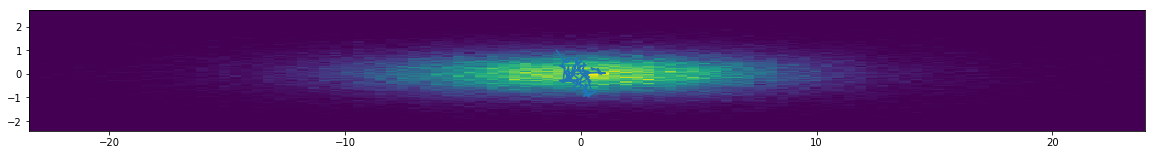

In [6]:
plt.figure(figsize=(20,20))
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.hist2d(x=background_y[:,0], y=background_y[:,1], bins=100)
_ = plt.plot(metr_y.transpose()[0,:], metr_y.transpose()[1,:])

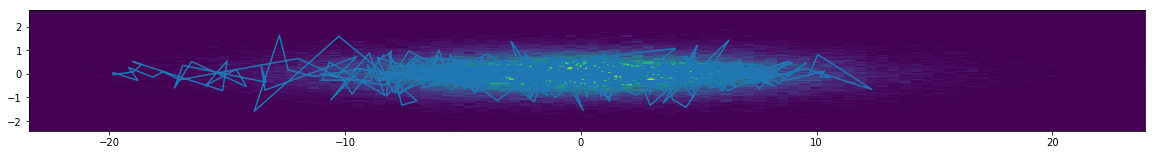

In [7]:
plt.figure(figsize=(20,20))
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.hist2d(x=background_y[:,0], y=background_y[:,1], bins=100)
_ = plt.plot(nuts_y.transpose()[0,:], nuts_y.transpose()[1,:])

In [ ]:
scale = 1

## Ring

In [3]:
ring_model = pm.Model()
N = 100000
ndim = 2

try:
    with open("ring2dim100000_v2.pkl", "rb") as f:
        background_y = pickle.load(f)
except:
    with ring_model:
        mu = pm.Normal('mu', mu=0, sd=1, shape=(ndim), testval=0.1)
        mu_circle = pm.Deterministic("mu_circle", 5*(mu/np.sqrt((mu**2).sum())))
        y = pm.MvNormal('y', mu=mu_circle, cov=np.identity(ndim)/10, shape=(1,ndim))
        step = pm.NUTS([mu, y])
        trace = pm.sample(N, step=step, tune=1000)
    background_y = trace.get_values("y")

In [4]:
background_y = background_y.reshape(N, ndim)

In [5]:
cov = np.identity(ndim)/10

In [14]:
sample_N = 1000

metr_ring_model = pm.Model()
nuts_ring_model = pm.Model()
cov = np.identity(ndim)/10
"""
with metr_ring_model:
    mu = pm.Normal('mu', mu=0, sd=1, shape=ndim, testval=0.1)
    mu_circle = pm.Deterministic("mu_circle", 5*(mu/np.sqrt((mu**2).sum())))
    y = pm.MvNormal('y', mu=mu_circle.flatten(), cov=np.identity(ndim)/10, shape=(ndim))
    step = pm.Metropolis(vars=[mu, y, mu_circle])
    trace = pm.sample(sample_N, step=step, tune=1000)
#metr_ring_y = trace2.get_values("y")
#metr_ring_y = metr_ring_y.reshape(sample_N, ndim)
"""
with nuts_ring_model:
    mu = pm.Normal('mu', mu=0, sd=1, shape=(ndim), testval=0.1)
    mu_circle = pm.Deterministic("mu_circle", 5*(mu/np.sqrt((mu**2).sum())))
    y = pm.MvNormal('y', mu=mu_circle, cov=np.identity(ndim)/10, shape=(ndim))
    step = pm.NUTS([mu, y])
    trace = pm.sample(sample_N, step=step, tune=1000)
nuts_ring_y = trace.get_values("y")
nuts_ring_y = nuts_ring_y.reshape(sample_N, ndim)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y, mu]
 98%|█████████▊| 1952/2000 [00:31<00:00, 72.58it/s]/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 1999/2000 [00:31<00:00, 90.71it/s]/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2000/2000 [00:31<00:00, 62.71it/s]


ValueError: cannot reshape array of size 4000 into shape (1000,2)

In [7]:
pm.__version__

'3.2'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0770035fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f076f3bb320>]], dtype=object)

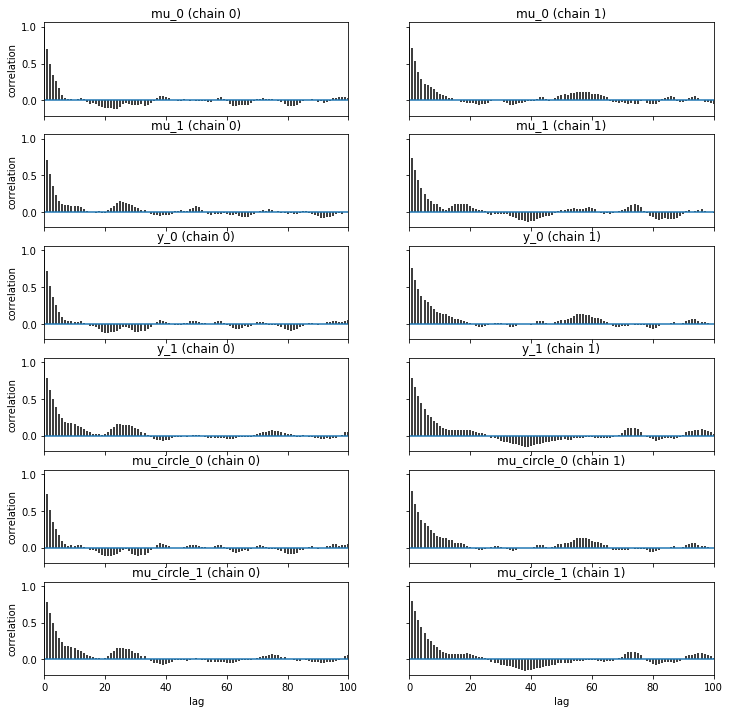

In [15]:
pm.plots.autocorrplot(trace)

In [9]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0,-0.543054,0.809423,0.078315,-2.094906,0.882901,3.0,1.253865
mu__1,0.337740,0.918943,0.089893,-1.555496,2.442388,2.0,1.462537
y__0,-2.310334,2.824371,0.280877,-5.365155,3.068585,2.0,1.395418
y__1,1.738467,3.031946,0.301672,-4.968939,5.092598,2.0,1.737342
mu_circle__0,-2.285508,2.773579,0.276393,-4.999592,2.870888,2.0,1.397254
mu_circle__1,1.735210,3.012103,0.300153,-4.728525,4.999649,2.0,1.737137


In [16]:
pm.diagnostics.effective_n(trace) #1000

{'mu': array([ 301.,  249.]),
 'mu_circle': array([ 251.,  184.]),
 'y': array([ 250.,  180.])}

In [154]:
pm.diagnostics.effective_n(trace) #5000

{'mu': array([  1.,   1.,   1.,   1.,   4.,   1.,   1.,   3.,   1.,   1.,   1.,
          1.,   3.,   4.,   1.,   3.,   8.,   4.,   1.,   2.,   4.,   8.,
          2.,   1.,   1.,   1.,   5.,  13.,   1.,   1.,   2.,   3.,   1.,
          4.,   1.,   1.,   1.,   9.,   5.,   6.,   1.,   1.,   5.,   5.,
          1.,   2.,   2.,   1.,   5.,   1.]),
 'mu_circle': array([  1.,   1.,   1.,   1.,   4.,   1.,   1.,   2.,   1.,   1.,   1.,
          1.,   2.,   5.,   1.,   3.,  10.,   3.,   2.,   2.,   4.,  10.,
          5.,   1.,   1.,   1.,   4.,  11.,   1.,   1.,   2.,   3.,   2.,
          5.,   1.,   1.,   1.,   8.,   4.,   7.,   1.,   1.,   4.,   4.,
          1.,   3.,   3.,   4.,   9.,   1.]),
 'y': array([  1.,   2.,   1.,   1.,   5.,   1.,   1.,   3.,   1.,   1.,   1.,
          1.,   3.,   6.,   1.,   5.,  10.,   5.,   1.,   2.,   4.,  15.,
          5.,   1.,   1.,   1.,   9.,  14.,   1.,   1.,   2.,   5.,   3.,
          6.,   1.,   2.,   1.,  14.,   6.,   8.,   1.,   1.,   5.,   

In [153]:
pm.diagnostics.effective_n?

In [ ]:
pm.dia?nostics.effective_n

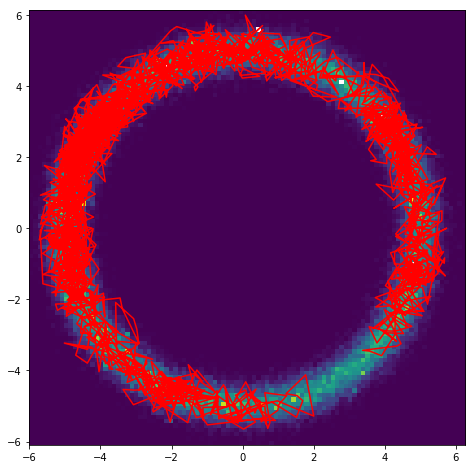

In [64]:
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.hist2d(x=background_y.transpose()[0,:], y=background_y.transpose()[1,:],bins=100, cmax=100)
_ = plt.plot(metr_ring_y.transpose()[0,:], metr_ring_y.transpose()[1,:], "r")

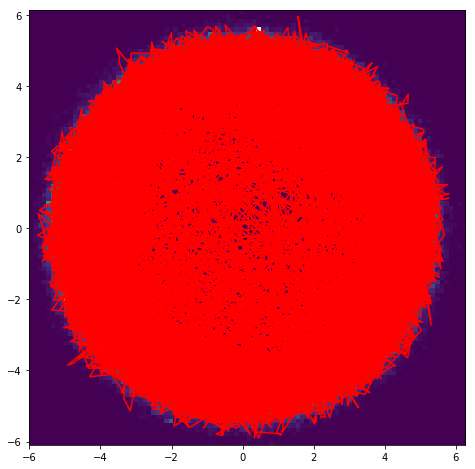

In [65]:
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.hist2d(x=background_y.transpose()[0,:], y=background_y.transpose()[1,:],bins=100, cmax=100)
_ = plt.plot(nuts_ring_y.transpose()[0,:], nuts_ring_y.transpose()[1,:], "r")

In [17]:
import sklearn.datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pickle
import theano
import theano.tensor as T
import os
from sklearn.neural_network import MLPClassifier
%matplotlib inline

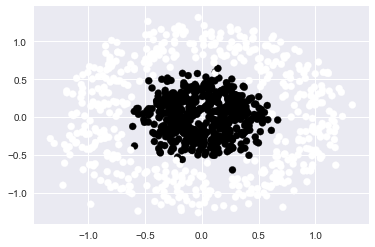

In [203]:
X, y = sklearn.datasets.make_circles(1000, noise = 0.15, factor=0.3)
plt.scatter(x=X.transpose()[0], y=X.transpose()[1], c=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
MLPClassifier?

In [234]:
clf = MLPClassifier(hidden_layer_sizes=(6,6))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


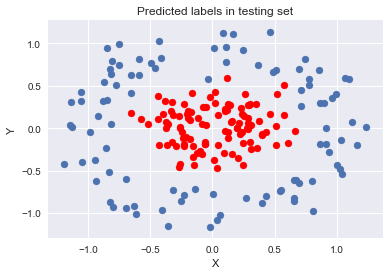

In [235]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y',);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [noise, x_interval__]
 87%|████████▋ | 1304/1500 [00:04<00:00, 339.35it/s]/usr/local/lib/python3.5/dist-packages/pymc3-3.2-py3.5.egg/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 1500/1500 [00:05<00:00, 286.26it/s]


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [188]:
len(X_train)

3

In [152]:
len(y_train)

1600

100%|██████████| 500/500 [00:00<00:00, 593.41it/s]


In [170]:
all_pred = ppc["out"]

In [1]:
plt.plot?

Object `plt.plot` not found.


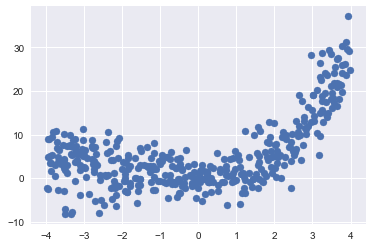

In [167]:
plt.scatter(X_test, y_test)


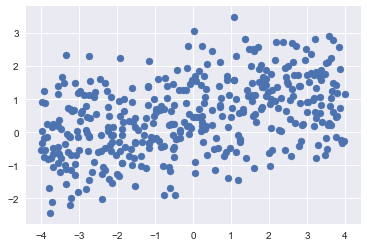

In [174]:
plt.scatter(X_test, all_pred[300])

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [186]:
np.reshape(X_train,(-1,1))

array([[-2.09187904],
       [-3.35061093],
       [-2.8443897 ]])

In [185]:
pred

array([ 8.2556886])

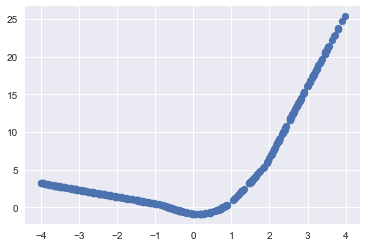

In [199]:
plt.scatter(X_test, pred)